# Amazon Sales Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [18]:
df=pd.read_csv("Amazon Sales Data.csv")

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# dropping the empty columns 

df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


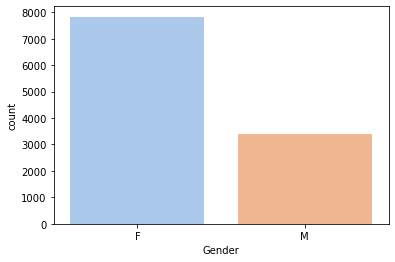

In [9]:
ax=sns.countplot(x="Gender",data=df)

In [10]:
sales_gen=df.groupby(["Gender"], as_index=False)["Amount"].sum()
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


In [11]:
sales_state=df.groupby(["State"], as_index=False)["Amount"].sum()
sales_state

,State,Amount
0,Andhra�Pradesh,8037146.99
1,Bihar,4022757.00
2,Delhi,11603819.45
3,Gujarat,3946082.00
4,Haryana,4220175.00
5,Himachal Pradesh,4963368.00
6,Jharkhand,3026456.00
7,Karnataka,13523540.00
8,Kerala,3894491.99
9,Madhya Pradesh,8101142.00


In [12]:
# to sort the values in ascending order, add one more variable

sales_state=df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(ascending=False,by="Amount").head()
sales_state

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00


In [13]:
sales_state.head()

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00


<AxesSubplot:xlabel='State', ylabel='Amount'>

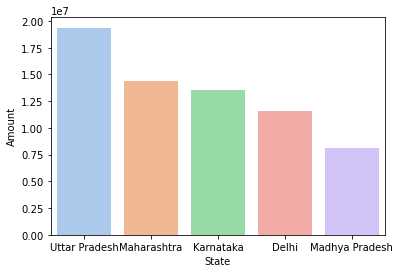

In [14]:
sns.barplot(x="State",y="Amount",data=sales_state.head())

In [15]:
# finding the total sales amount by product category

sales_prod=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(ascending=False,by="Amount").head()
sales_prod

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99


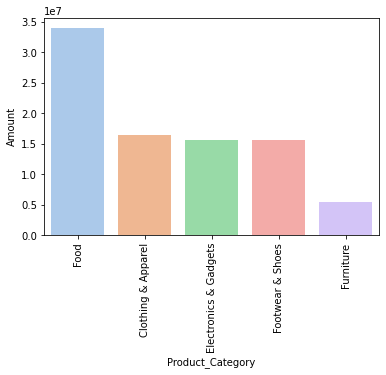

In [16]:
sns.barplot(x="Product_Category",y="Amount",data=sales_prod)
plt.xticks(rotation=90)
plt.show()